### Exercise 1 - Chapter 2  
A statistical summary of the college data, which can be downloaded here: 
http://www-bcf.usc.edu/~gareth/ISL/data.html

In [19]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# 777 aggregated records for US colleges and universities.
df =pd.read_csv("c:/users/beckyc/downloads/college.csv")

In [126]:
len(df)
df.head(1)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60


Apps            3001.638353
Accept          2018.804376
Enroll           779.972973
Top10perc         27.558559
Top25perc         55.796654
F.Undergrad     3699.907336
P.Undergrad      855.298584
Outstate       10440.669241
dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000092EA1D0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000000099097B8>], dtype=object)

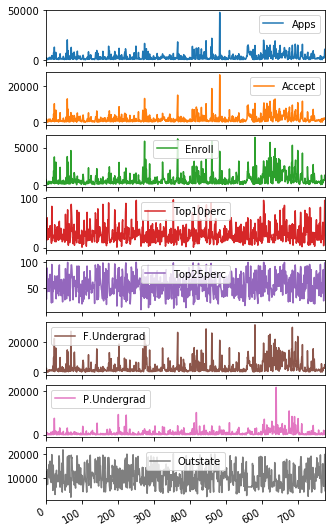

In [2]:
# rename firt column to college 
df.rename(columns={'Unnamed: 0':'college'},inplace = True)
print(df.ix[:,0:10].mean())

#Create scatter plots of the first 10 columns 

df.ix[:,0:10].plot(subplots = True,figsize = (5,10))#df.Apps,kind='hist')

In [128]:
df['privateInt'] = np.where(df.Private == 'Yes',1,0)

,college,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,privateInt
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,1
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,1
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,1
776,York College of Pennsylvania,Yes,2989,1855,691,28,63,2988,1726,4990,3560,500,1250,75,75,18.1,28,4509,99,1


** (c) iii  
Use the plot() function to produce side-by-side boxplots of Outstate versus Private.**


Private
No      6813.410377
Yes    11801.693805
Name: Outstate, dtype: float64

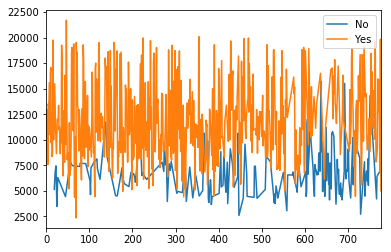

In [129]:
df['Outstate'].groupby(df.Private).plot(kind= 'line', legend =True) #I want to group by Private
df['Outstate'].groupby(df.Private).mean()

** (c) iv  
Create a new qualitative variable, called Elite,by binning the Top10perc variable. We are going to divide universities
into two groups based on whether or not the proportion of students coming from the top 10 % of their high school classes exceeds 50%. ** 

In [4]:
#df['Elite'] = 
#np.linspace(df.Top10perc.min(), df.Top10perc.max(), 10)
#df['Top10perc'].head()

df['Elite'] = np.where(df.Top10perc >50,"Yes","No")
df.head(1)

,college,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,No


** Use the summary() function to see how many elite universities there are.**

In [124]:
#How many elite universities are there?
df['Outstate'].groupby(df.Elite).count()

count     777
unique      2
top        No
freq      699
Name: Elite, dtype: object

** Produce side-by-side boxplots of Outstate versus Elite. ** 

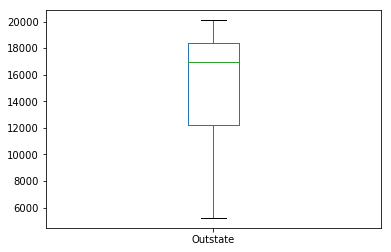

In [198]:
#df['Outstate'].groupby(df.Elite).plot(kind= 'box')

dfe= df[df.Elite =='Yes']
dfe['Outstate'].plot(kind= 'box')


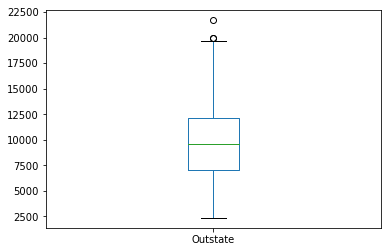

In [196]:
dfne = df[df.Elite =='No']
dfne['Outstate'].plot(kind= 'box')

In [13]:
#create histograms for a few of the quant variables.
df.dtypes

college         object
Private         object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
Elite           object
dtype: object

** Produce some histograms with diﬀering numbers of bins for a few of the quantitative variables ** 

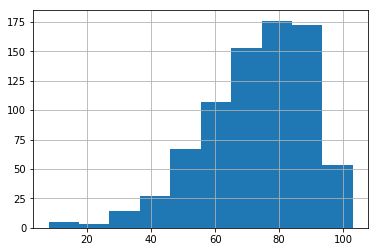

In [23]:
# df.groupby(df.Elite).Books.hist()
# df.groupby(df.Private).Books.hist()
df.PhD.hist()


** Continue exploring the data, and provide a brief summary of what you discover. ** 

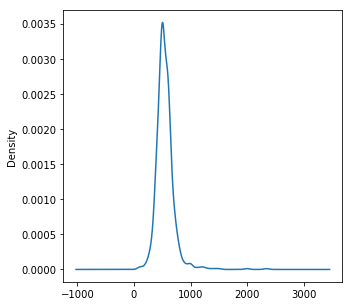

In [20]:
##checking if data is normally distributed... 
df['Books'].plot(kind="density", figsize=(5,5))

In [25]:
df['PhD'].describe()

count    777.000000
mean      72.660232
std       16.328155
min        8.000000
25%       62.000000
50%       75.000000
75%       85.000000
max      103.000000
Name: PhD, dtype: float64

** 9.  
This exercise involves the Auto data set studied in the lab. Make sure that the missing values have been removed from the data. ** 

In [43]:
auto =pd.read_csv("c:/users/beckyc/downloads/auto.csv")

In [28]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [34]:
#remove missing values from the data 
pd.isnull(auto).sum() # Can't see any nulls in the data 

auto = auto[auto.notnull()].copy()

** a) Which of the predictors are continuous? ** 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CCF5BA8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000CF4C358>]], dtype=object)

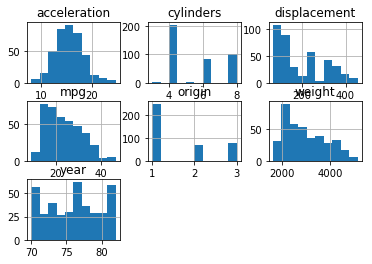

In [42]:
len(auto)

auto.hist()
# Continuous - acceleration, displacement, mpg, year, weight, cyclinders.
# Categorical- origin

**b) what is the range of each quantitative predictor?  
c) What is the mean & standard deviation?**

In [45]:
quant = ['mpg','cylinders','displacement','weight','acceleration','year']
auto[quant].describe() # see min, 25%, 50%,75% and max 

,mpg,cylinders,displacement,weight,acceleration,year
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000


**d) Remove the 10th to 85th observations and rerun describe()**

autosub = auto.ix[] #TBC 

**e) Using the full data set investigate the predictors graphically to highlight relationships amongst the predictors.**

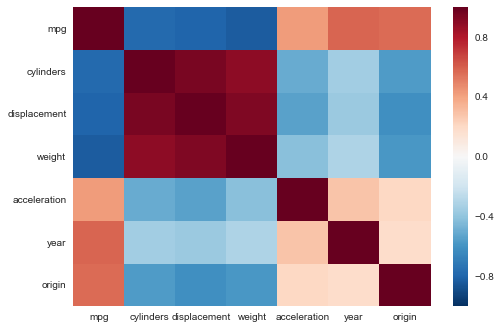

In [49]:
sns.heatmap(auto.corr())

mpg             1.000000
cylinders      -0.776260
displacement   -0.804443
weight         -0.831739
acceleration    0.422297
year            0.581469
origin          0.563698
Name: mpg, dtype: float64


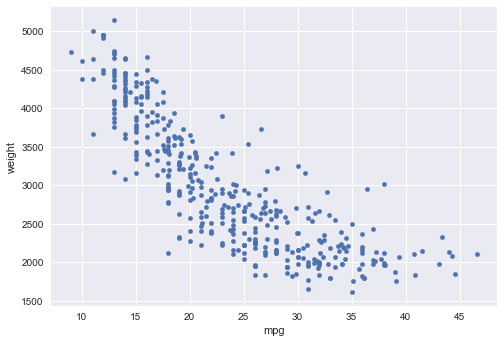

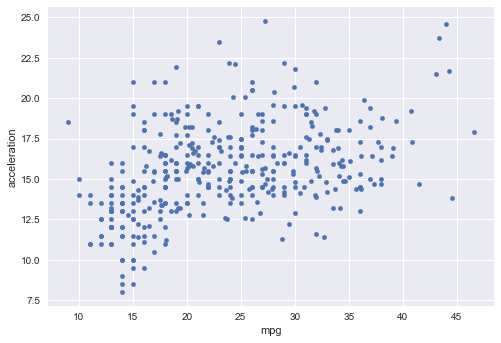

In [56]:
auto.plot('mpg', 'weight',kind = 'scatter')
auto.plot('mpg', 'acceleration',kind = 'scatter')

print(auto.corr().mpg)

weight/displacement: 0.933104416749

weight/acceleration: -0.419502328494


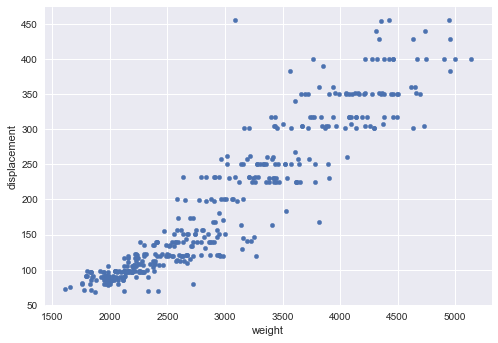

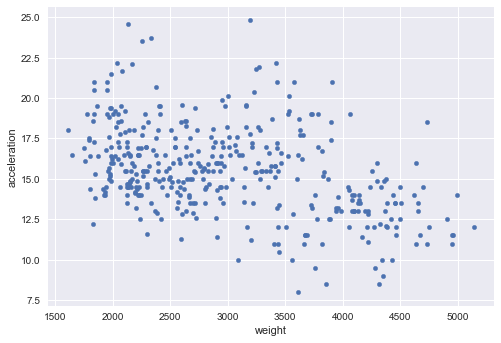

In [89]:
auto.plot('weight', 'displacement',kind = 'scatter')
auto.plot('weight', 'acceleration',kind = 'scatter')

print("weight/displacement:", auto.corr().weight.displacement)
print()
print("weight/acceleration:", auto.corr().weight.acceleration)


Skew_  0.456004961924


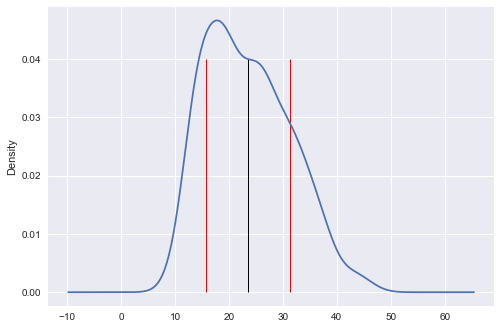

In [71]:
print("Skew_ ",auto.mpg.skew())
auto.mpg.plot(kind="density")
    
plt.vlines(auto.mpg.mean(),     # Plot black line at mean
              ymin=0, 
              ymax=0.04,
              linewidth=1.0)

greSTD = auto.mpg.std()
plt.vlines(auto.mpg.mean()+greSTD,     # Plot red line at +1 std dev
            ymin=0, 
            ymax=0.04,
            linewidth=1.0, 
            color = "red")

plt.vlines(auto.mpg.mean()-greSTD,     # Plot red line at -1 std dev
           ymin=0, 
           ymax=0.04,
           linewidth=1.0, 
           color = "red")

Skew_  0.530988976724


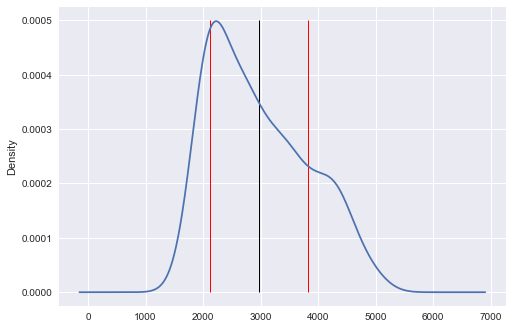

In [69]:
print("Skew_ ",auto.weight.skew())
auto.weight.plot(kind="density")
    
plt.vlines(auto.weight.mean(),     # Plot black line at mean
              ymin=0, 
              ymax=0.0005,
              linewidth=1.0)

greSTD = auto.weight.std()
plt.vlines(auto.weight.mean()+greSTD,     # Plot red line at +1 std dev
            ymin=0, 
            ymax=0.0005,
            linewidth=1.0, 
            color = "red")

plt.vlines(auto.weight.mean()-greSTD,     # Plot red line at -1 std dev
           ymin=0, 
           ymax=0.0005,
           linewidth=1.0, 
           color = "red")

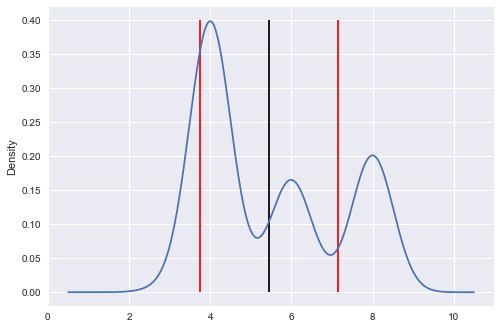

In [83]:
auto.cylinders.plot(kind ='density')
plt.vlines(auto.cylinders.mean(), ymin = 0, ymax = 0.4)
plt.vlines(auto.cylinders.mean()+ auto.cylinders.std(), ymin = 0, ymax=0.4, color='red')
plt.vlines(auto.cylinders.mean()- auto.cylinders.std(), ymin = 0, ymax=0.4, color='red')

** f) Predict mileage (mpg) on the basis of other variables. Which variables might be useful? ** 

In [91]:
auto.corr().mpg

mpg             1.000000
cylinders      -0.776260
displacement   -0.804443
weight         -0.831739
acceleration    0.422297
year            0.581469
origin          0.563698
Name: mpg, dtype: float64

All variables show a moderate or higher correlation with MPG (accelaration is the least correlated at 0.42).  
Weight, cylinders and displacement are all highly correlated (>0.89).   
Weight has the highest correlation with mpg (0.83) so this variable will be kept.


,mpg,cylinders,displacement,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.933104,-0.544162,-0.369804,-0.610664
weight,-0.831739,0.897017,0.933104,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.581265,0.210084,0.184314,1.000000


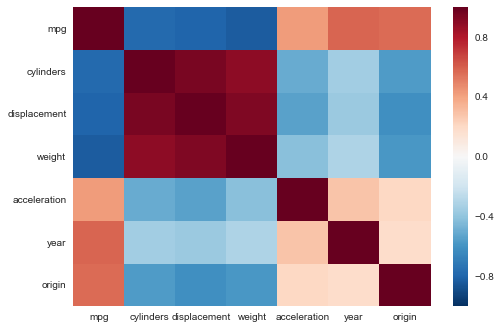

In [93]:
sns.heatmap(auto.corr())
auto.corr()

** 10. Boston data set ** 

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)
bostondf = pd.DataFrame(boston.data, columns=boston.feature_names) #converting to dataframe

(506, 13)


** a) How many rows are in this data set? How many columns? What do the rows and columns represent? ** 

In [17]:
print(bostondf.dtypes)
bostondf.head()

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


** (b) Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your ﬁndings. ** 

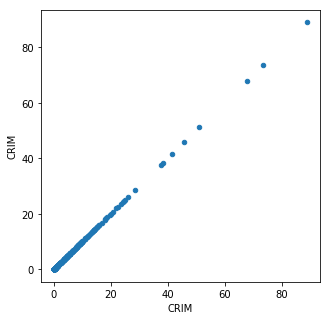

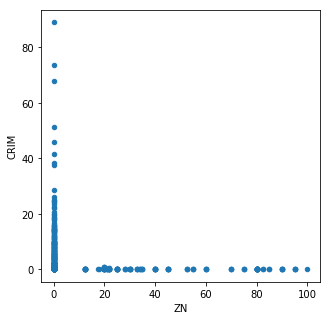

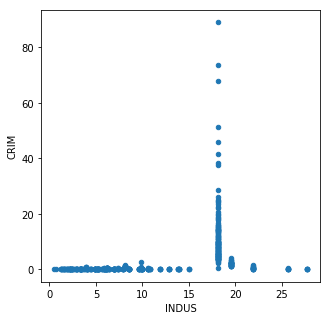

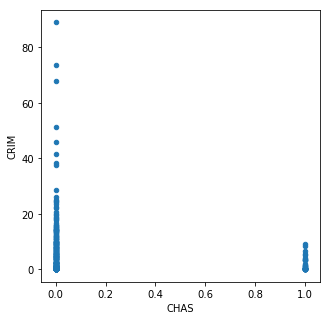

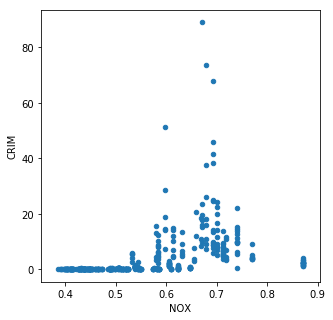

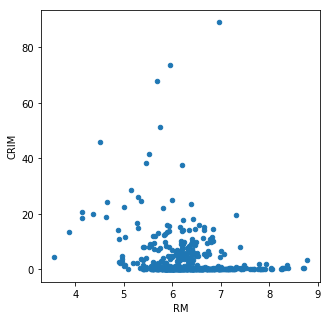

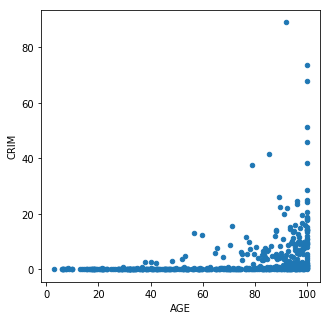

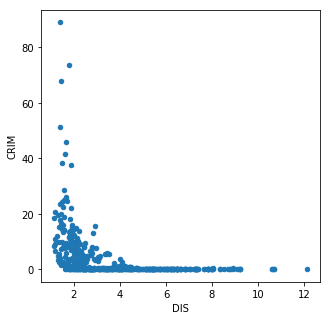

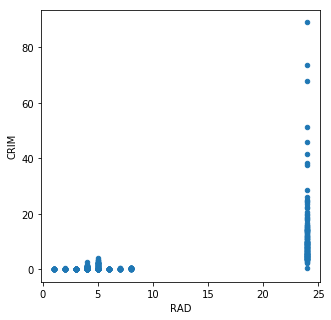

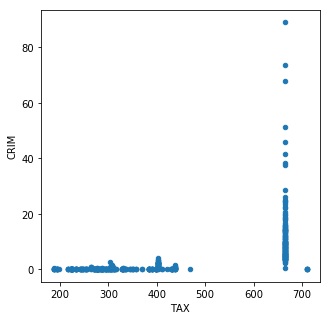

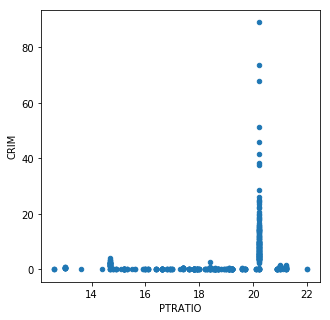

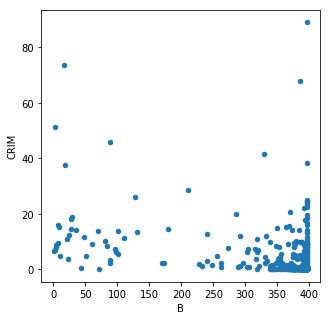

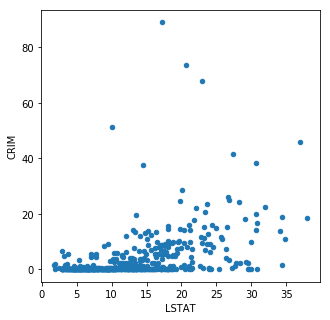

In [9]:
for c in bostondf.columns:
    bostondf.plot(x=c, y='CRIM', kind = 'scatter', figsize=(5,5))

    

** c) Are any of the predictors associated with per capita crime rate CRIM? ** 

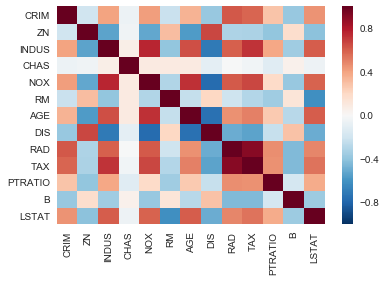

In [24]:

sns.heatmap(bostondf.corr())
bostondf.corr().CRIM

features = ['INDIUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

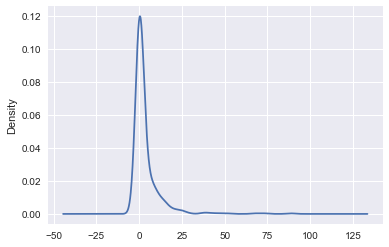

In [32]:
bostondf['CRIM'][(bostondf.CRIM>0)].plot(kind ='density')

In [28]:
bostondf[(bostondf.CRIM>0)].mean() #mean for crims

CRIM         3.593761
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
dtype: float64

** d) Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on
the range of each predictor. ** 

In [34]:
#5 highest suburbs by crim rate 
bostondf.sort_values(by = 'CRIM', ascending = False).head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
380,88.9762,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21
418,73.5341,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98
410,51.1358,0.0,18.1,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11
414,45.7461,0.0,18.1,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98


** e) How many of the suburbs in the dataset bound the charles river (CHAS)?  
35 ** 

In [62]:
print(bostondf[(bostondf.CHAS==1)].count().head(1))

#What is the median pupil-teacher ratio among towns?
print( bostondf.PTRATIO.median())

#How many suburbs average more than 7 rooms per dwelling 
print(bostondf[(bostondf.RM>7)].count().head(1))

CRIM    35
dtype: int64
19.05
CRIM    64
dtype: int64
